In [1]:
import matplotlib.pyplot as plt
from torchsummary import summary
from model import LeNet, VGG, CNNRNN, CNN1DRNN, CNN1D, ParallelNet
import model as model

In [2]:
def lossvalues(results):
    train_loss=[]
    validation_loss=[]
    validation_accuracy=[]
    test_accuracy=0
    for line in results:
        if(line.startswith("Train set")):
            train_loss.append(float(line.split()[4]))
            
        if(line.startswith("Validation set")):
            
            validation_loss.append(float(line.split()[4][:-1]))
            
            acc=line.split()[7][1:3]
            validation_accuracy.append(int(acc))
        if(line.startswith("Test set")):
            test_accuracy=int(line.split()[-1][1:3])
    return train_loss, validation_loss, validation_accuracy, test_accuracy




In [3]:
def plotgraphs(t_l,v_l):
    plt.figure(figsize=(14, 3))
    plt.plot(t_l, label = 'Train Loss')
    plt.plot(v_l, label = 'Val Loss')
    plt.legend()
    plt.show()

In [4]:
def readOutput(filename,model=None,input_size=None):
    


    with open(filename) as f:
        results = f.readlines()
    print(results[0])
    results_t_l, results_v_l, results_v_a, t_a=lossvalues(results)
    plotgraphs(results_t_l,results_v_l)
    print('\033[1m' + "Total Epochs that model ran - " + '\033[0m',len(results_t_l))
    print('\033[1m' + "Validation Set Final Accuracy - " + '\033[0m',results_v_a[-1])
    print('\033[1m' + "Test Set Accuracy - " + '\033[0m', t_a)
    print('\033[1m' + "Model Configuration" + '\033[0m')
    if(model!=None):
        print(model)
    if(input_size!=None):
        print(summary(model, input_size=input_size))
    
    return results_v_a

# LeNet

Namespace(arc='LeNet', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='SPECT', log_interval=10, loss_func='NLL', lr=0.001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



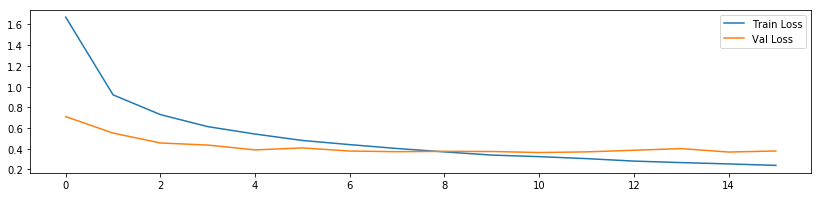

Total Epochs that model ran -  16
Validation Set Final Accuracy -  90
Test Set Accuracy -  89
Model Configuration
LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=16280, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=30, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 20, 157, 97]             520
            Conv2d-2           [-1, 20, 74, 44]          10,020
         Dropout2d-3           [-1, 20, 74, 44]               0
            Linear-4                 [-1, 1000]      16,281,000
            Linear-5                   [-1, 30]          30,030
Total params: 16,321,570
Trainable params: 16,321,570
Non-trainable params: 0
----------------------------------------------------------------
Inpu

In [5]:
model=LeNet(16280)
input_size=(1,161,101)
lenet_v_a=readOutput("output/lenet.txt", model, input_size=input_size)





# VGG

Namespace(arc='VGG11', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='SPECT', log_interval=10, loss_func='NLL', lr=0.001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



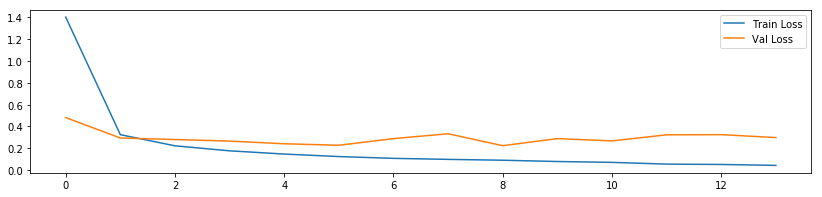

Total Epochs that model ran -  14
Validation Set Final Accuracy -  94
Test Set Accuracy -  94
Model Configuration
VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momen

In [6]:
model = VGG("VGG11", 7680)
input_size=(1,161,101)
vgg11_v_a=readOutput("output/vgg11.txt", model, input_size=input_size)

Namespace(arc='VGG13', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='SPECT', log_interval=10, loss_func='NLL', lr=0.001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



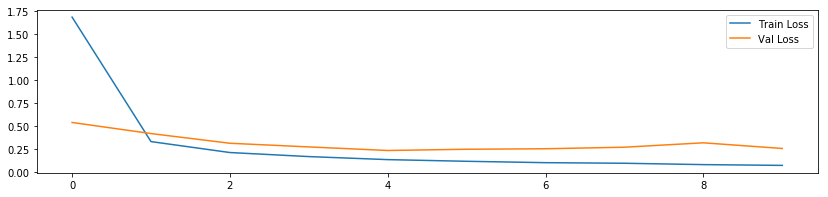

Total Epochs that model ran -  10
Validation Set Final Accuracy -  94
Test Set Accuracy -  95
Model Configuration


In [7]:

model = VGG("VGG13", 7680)

vgg13_v_a=readOutput("output/vgg13.txt")

# ResNet

Namespace(arc='ResNet18', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='MEL40', log_interval=10, loss_func='CrossEntropy', lr=0.0001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test/', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



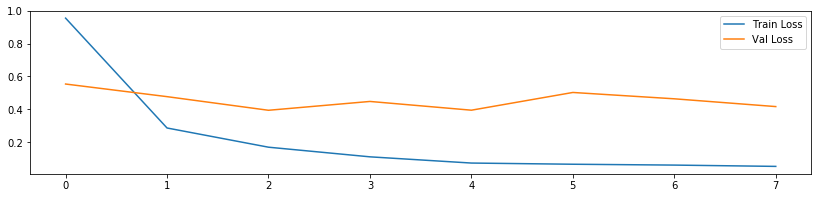

Total Epochs that model ran -  8
Validation Set Final Accuracy -  91
Test Set Accuracy -  92
Model Configuration


In [8]:
resnet18_v_a=readOutput("output/resnet18.txt")

Namespace(arc='ResNet34', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='MEL100', log_interval=10, loss_func='CrossEntropy', lr=0.0001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test/', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



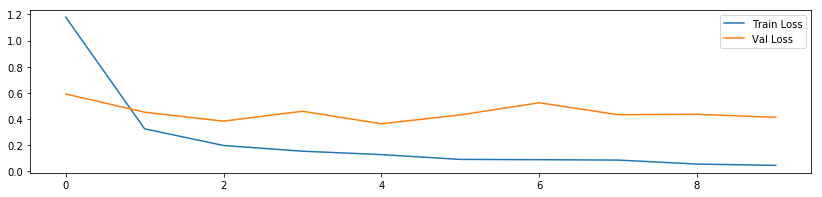

Total Epochs that model ran -  10
Validation Set Final Accuracy -  91
Test Set Accuracy -  91
Model Configuration


In [9]:
resnet34_v_a=readOutput("output/resnet34.txt")

# CNNRNN

Namespace(arc='CNNRNN', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='MEL100', log_interval=10, loss_func='NLL', lr=0.0001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test/', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



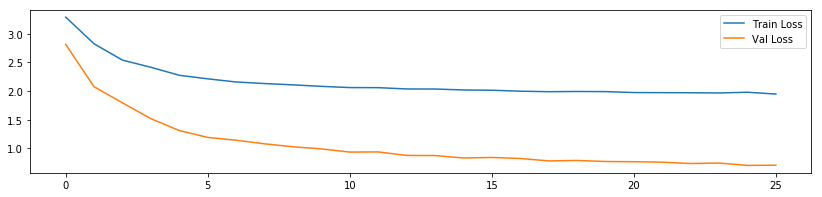

Total Epochs that model ran -  26
Validation Set Final Accuracy -  87
Test Set Accuracy -  88
Model Configuration
CNNRNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=[2, 1])
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_drop): Dropout2d(p=0.2)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.25)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3_drop): Dropout2d(p=0.3)
  (rnn): LSTM(256, 128, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=1280, out_features=640, bias=True)
  (fc1_drop): Dropout(p=0.4)
  (fc2): Linear(in_features=640, out_features=30, bias=True)
  (fc2_drop): Dropout(p=0.5)
)


In [10]:
model=CNNRNN()
input_size=(1,100,101)
cnnrnn_v_a=readOutput("output/cnnrnn.txt", model)


# CNN 1D

Namespace(arc='CNN1D', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='RAW', log_interval=10, loss_func='NLL', lr=0.0001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test/', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



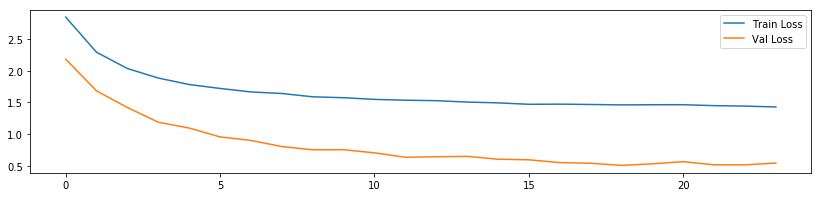

Total Epochs that model ran -  24
Validation Set Final Accuracy -  91
Test Set Accuracy -  90
Model Configuration
CNN1D(
  (conv1): Conv1d(1, 128, kernel_size=(80,), stride=(4,))
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2)
  (max_pool_1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5)
  (max_pool_2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.5)
  (max_pool_3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (bn4): Batch

In [11]:
model=CNN1D()
input_size=(1,16000)
cnn1d_v_a=readOutput("output/cnn1d.txt", model, input_size=input_size)


# ParallelNet

Namespace(arc='Parallel', batch_size=100, cuda=True, datacleaning=False, epochs=100, input_format='STFT', log_interval=10, loss_func='NLL', lr=0.0001, max_len=101, momentum=0.9, normalize=True, optimizer='adam', patience=5, seed=1234, test_batch_size=100, test_path='data/test/', train_path='data/train/', valid_path='data/valid', window_size=0.02, window_stride=0.01, window_type='hamming')



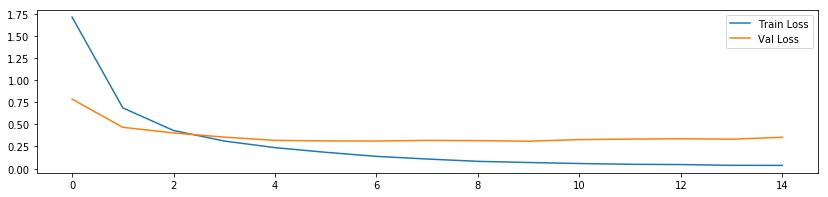

Total Epochs that model ran -  15
Validation Set Final Accuracy -  91
Test Set Accuracy -  92
Model Configuration
ParallelNet(
  (conv1_2): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1_2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn3_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn4_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5)
  (conv1): Conv1d(1, 128, kernel_size=(80,), stride=(4,))
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool_1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, cei

In [12]:
model=ParallelNet(13056)
cnn1d_v_a=readOutput("output/parallel.txt", model)